In [2]:
!pip install easyocr

In [3]:
import cv2
import matplotlib.pyplot as plt


In [4]:
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

In [5]:
image_path = r"D:\Downloads\a7sp8ji_high-security-number-plates_625x300_12_October_18.webp" # Correctly formatted path
car_image = cv2.imread(image_path)

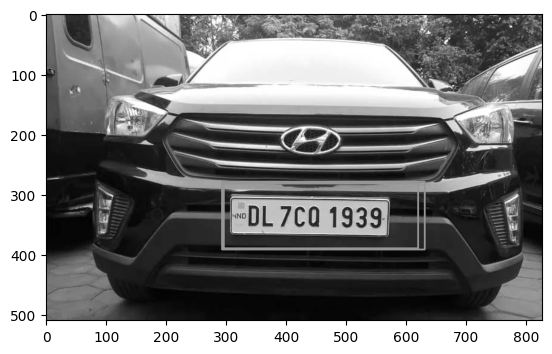

In [16]:
if car_image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Convert the image to grayscale for detection
    gray_image = cv2.cvtColor(car_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')



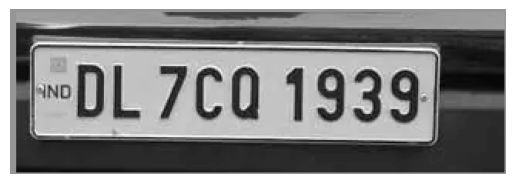

In [17]:
    # Detect number plates in the image
    plates = plate_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Check if any number plate was detected
    if len(plates) > 0:
        for (x, y, w, h) in plates:
            # Draw rectangle around the detected number plate (optional)
            cv2.rectangle(car_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
            # Crop the detected number plate from the image
            number_plate = car_image[y:y+h, x:x+w]

            # Convert the cropped number plate to grayscale
            number_plate_gray = cv2.cvtColor(number_plate, cv2.COLOR_BGR2GRAY)

            # Display the grayscale number plate using matplotlib
            plt.imshow(number_plate_gray, cmap='gray')  # Display in grayscale
            plt.axis('off')  # Hide axes
            plt.show()
    else:
        print("No number plate detected.")

In [18]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext(number_plate_gray)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[17, 47], [43, 47], [43, 61], [17, 61]], 'AND', 0.2895306132148704),
 ([[36, 30], [274, 30], [274, 80], [36, 80]],
  'DL 7cQ 1939',
  0.3970361233593139)]

In [19]:
recognized_texts = []

# Iterate through the results and collect recognized texts
for detection in result:
    recognized_texts.append(detection[1])  # Append the recognized text to the list

# Check if there are recognized texts and format the desired output
if recognized_texts:
    # Assuming you want the second recognized text if it exists
    if len(recognized_texts) > 1:
        formatted_text = recognized_texts[1].upper()  # Convert to uppercase
    else:
        formatted_text = recognized_texts[0].upper()  # Use the first recognized text

    # Print the final formatted text
    print(formatted_text.replace(" ", " "))  # Maintain the spaces as needed
else:
    print("No text recognized.")

DL 7CQ 1939
